In [1]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import sys
import importlib

sys.path.append("..")

import pickle
from autogenes import AutoGenes

In [2]:
%load_ext autoreload
%autoreload 1
%aimport autogenes

In [3]:
importlib.reload(autogenes)

<module 'autogenes' from '../autogenes/__init__.py'>

In [4]:
bulkdata = pd.read_csv('../datasets/GSE75748_bulk_data.csv',index_col='index')
bulkdata = bulkdata.T
#bulkdata = bulkdata.drop(bulkdata.columns[20:], axis=1)
bulkdata.head()


index,CD109,CD163,PHYHIPL,OR9A4,CDH1,TMIE,APOA2,GAGE12D,USP29,TTLL2,...,LRRC2,PDE11A,PFDN4,OPN5,DLC1,IFI44L,PRR23A,GDF9,DDA1,CCDC125
H1,0.155816,0.000010,0.004350,0.000022,1.885752,0.000446,0.001204,0.000000,0.009259,0.001220,...,0.388692,0.092628,0.920212,0.000021,0.032301,0.002657,0.047878,0.000157,0.123657,0.262672
DBC,0.137496,0.089907,0.088457,0.000000,0.428238,0.010872,1.045434,0.000000,0.010952,0.004461,...,0.522557,0.097860,0.656919,0.000364,1.677883,0.004834,0.052945,0.000160,0.222568,0.372195
EC,2.160324,0.004771,0.000000,0.000000,0.160532,0.001173,0.000000,0.000000,0.012504,0.016121,...,0.371620,0.115885,0.368386,0.188562,2.828626,0.006612,0.061515,0.000000,0.271337,0.350892
HFF,4.340601,0.000000,0.000000,0.000000,0.123398,0.001487,0.000000,0.000000,0.012213,0.000061,...,0.327675,0.080658,0.478675,0.000000,1.756251,0.083066,0.047503,0.000000,0.168979,0.368760
NPC,0.109122,0.000000,0.023976,0.000092,0.165340,0.000000,0.000000,0.000052,0.012914,0.000045,...,0.373989,0.155740,0.752287,0.000269,0.622852,0.016263,0.061429,0.000000,0.243662,0.460025


# Run

In [5]:
ag = AutoGenes(bulkdata)
ag.run(ngen=0)

gen	nevals	pareto	distance        	correlation 
0  	100   	4     	349.65 - 1219.75	2.16 - 14.73


In [6]:
len(ag.pareto)

4

In [7]:
ag.print()

0: (1219.7457471064347, 13.63384023477531)
1: (1209.7372327345638, 13.382426339321881)
2: (1048.8931259927513, 2.796348241029566)
3: (772.9236374430153, 2.1566575269756623)


In [8]:
ag.summary()

Pareto front contains 4 individuals
Objective 'distance':
Min: 772.92, Mean: 1062.82, Std: 180.59, Max: 1219.75
Objective 'correlation':
Min: 2.16, Mean: 7.99, Std: 5.52, Max: 13.63


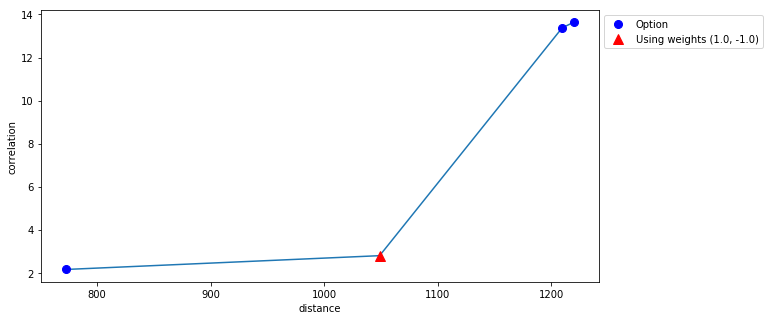

In [9]:
ag.plot(size='small')

In [10]:
ag.select()

IndividualGA([False,  True, False, ..., False, False, False])

In [11]:
ag.bulk_deconvolution(np.random.randn(4000))

array([[-0.0152318 , -0.00044888,  0.04041873, -0.02891617,  0.0145351 ,
        -0.0310785 ]])